In [2]:
import tensorflow as tf
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
demo_points = tf.constant([[1, 2, 2, 3, 4],
                           [2, 3, 3, 4, 5]], dtype="float32")

In [4]:
tf.print("Tensor: ", demo_points)

Tensor:  [[1 2 2 3 4]
 [2 3 3 4 5]]


In [9]:
tf.norm(demo_points, ord="euclidean", axis=1, keepdims=True)

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[5.8309517],
       [7.937254 ]], dtype=float32)>

In [29]:
import tensorflow as tf
import numpy as np

x = tf.constant([[1, 2, 3, 4],
                 [4, 5, 6, 7],
                 [7, 8, 9, 10]], tf.float32)


def initial_euclidean_matrix(input_tensor):
    tensor_shape = input_tensor.get_shape().as_list()
    tensor_iter = input_tensor
    #print("INPUT TENSOR:", tensor_iter)
    euclidean_list = []
    #print("INPUT SHAPE:---", tensor_shape, "\n")
    for i in range(tensor_shape[0]):
        #print([1, tensor_shape[0]-1])
        split_head, split_tail = tf.split(tensor_iter, [1, tensor_shape[0]-1])
        #print("SPLITS:", split_head, split_tail)
        tensor_iter = tf.concat([split_tail, split_head], 0)
        #print("NEW TENSOR ITER:", tensor_iter)
        #print("SUB:---", input_tensor-tensor_iter)
        #print("SQU:---", tf.square(input_tensor-tensor_iter))
        #print("SUM:---", tf.reduce_sum(tf.square(input_tensor-tensor_iter), 1))
        euclidean_dist = (tf.sqrt(tf.reduce_sum(tf.square(input_tensor-tensor_iter), 1)))
        #print("EUCLIDEAN DIST:", euclidean_dist)
        #print(asdasd)
        #print(euclidean_dist)
        #ses.run(euclidean_dist)
        #euclidean_row = euclidean_dist.eval(session=ses)
        euclidean_list.append(euclidean_dist)
    #print("\nEUCLIDEAN LIST:----------\n", euclidean_list)
    #print("EUCLIDEAN IN:-------\n", np.asarray(euclidean_list))
    euclidean_out = np.asarray(euclidean_list).transpose([1, 0])
    #print("EUCLIDEAN OUT:-----------\n", euclidean_out)
    #print(asdasdsd)

    for i in range(tensor_shape[0]):
        """print(i)
        print(euclidean_out[i])
        print(euclidean_out[i][tensor_shape[0]-1-i:])
        print(euclidean_out[i][:tensor_shape[0]-1-i])
        print(np.append(euclidean_out[i][tensor_shape[0]-1-i:], 
                                     euclidean_out[i][:tensor_shape[0]-1-i]))"""
        euclidean_out[i] = np.append(euclidean_out[i][tensor_shape[0]-1-i:], 
                                     euclidean_out[i][:tensor_shape[0]-1-i])
        """print(euclidean_out[i])
        print("\nCHANGE:----:\n",euclidean_out)
        print(asasdsad)"""

    '''
    the return type is numpy.array, if need tenor for return, use the code beneath
    '''
    euclidean_out = tf.convert_to_tensor(euclidean_out)

    return euclidean_out


print(initial_euclidean_matrix(x))


EUCLIDEAN OUT:-----------
 [[ 6. 12.  0.]
 [ 6.  6.  0.]
 [12.  6.  0.]]
0
[ 6. 12.  0.]
[0.]
[ 6. 12.]
[ 0.  6. 12.]
[ 0.  6. 12.]

CHANGE:----:
 [[ 0.  6. 12.]
 [ 6.  6.  0.]
 [12.  6.  0.]]


NameError: name 'asasdsad' is not defined

In [ ]:
def iou(y_true, y_pred, smooth = 100):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.square(y_true), axis = -1) + K.sum(K.square(y_pred), axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac

In [2]:
all_history_paths = np.sort(np.array(tf.io.gfile.glob(os.path.join("/home/priyam145/MelDetect/my_checkpoints/no_gm_aug_Featvec_models/Training_history/efficientnet_B6", "*.npy"))))
all_history_paths

array(['/home/priyam145/MelDetect/my_checkpoints/no_gm_aug_Featvec_models/Training_history/efficientnet_B6/efficientnet_B6_fold0_384_history.npy',
       '/home/priyam145/MelDetect/my_checkpoints/no_gm_aug_Featvec_models/Training_history/efficientnet_B6/efficientnet_B6_fold1_384_history.npy',
       '/home/priyam145/MelDetect/my_checkpoints/no_gm_aug_Featvec_models/Training_history/efficientnet_B6/efficientnet_B6_fold2_384_history.npy',
       '/home/priyam145/MelDetect/my_checkpoints/no_gm_aug_Featvec_models/Training_history/efficientnet_B6/efficientnet_B6_fold3_384_history.npy',
       '/home/priyam145/MelDetect/my_checkpoints/no_gm_aug_Featvec_models/Training_history/efficientnet_B6/efficientnet_B6_fold4_384_history.npy',
       '/home/priyam145/MelDetect/my_checkpoints/no_gm_aug_Featvec_models/Training_history/efficientnet_B6/efficientnet_B6_fold5_384_history.npy',
       '/home/priyam145/MelDetect/my_checkpoints/no_gm_aug_Featvec_models/Training_history/efficientnet_B6/efficientne

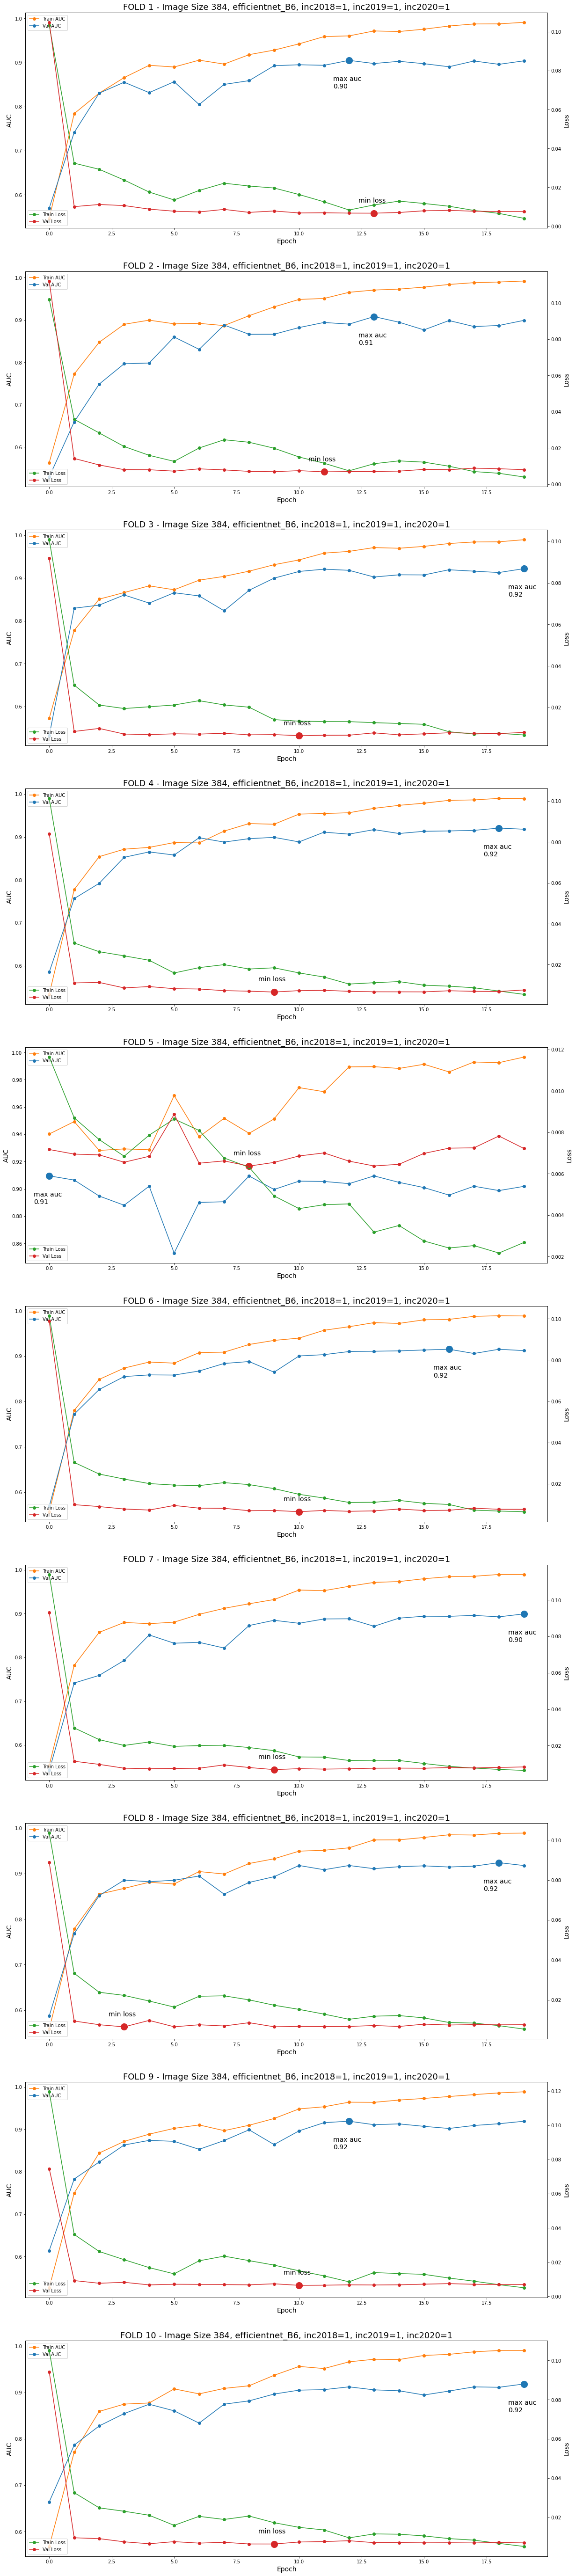

In [3]:
fig = plt.figure(figsize=(20, len(all_history_paths)*10))
for i, hist_path in enumerate(all_history_paths):
    hist_file = os.path.basename(hist_path)
    model_name = hist_file[:15]
    fold = int(hist_file[20])
    IMG_SIZE = int(hist_file[22:25])
    history = np.load(hist_path, allow_pickle=True).flatten()[0]
    fig.add_subplot(len(all_history_paths), 1, i+1)
    plt.plot(np.arange(len(history['auc'])),history['auc'],'-o',label='Train AUC',color='#ff7f0e')
    plt.plot(np.arange(len(history['val_auc'])),history['val_auc'],'-o',label='Val AUC',color='#1f77b4')
    x = np.argmax( history['val_auc'] ); y = np.max( history['val_auc'] )
    xdist = plt.xlim()[1] - plt.xlim()[0]; ydist = plt.ylim()[1] - plt.ylim()[0]
    plt.scatter(x,y,s=200,color='#1f77b4'); plt.text(x-0.03*xdist,y-0.13*ydist,'max auc\n%.2f'%y,size=14)
    plt.ylabel('AUC',size=14); plt.xlabel('Epoch',size=14)
    plt.legend(loc=2)
    plt2 = plt.gca().twinx()
    plt2.plot(np.arange(len(history['loss'])),history['loss'],'-o',label='Train Loss',color='#2ca02c')
    plt2.plot(np.arange(len(history['val_loss'])),history['val_loss'],'-o',label='Val Loss',color='#d62728')
    x = np.argmin( history['val_loss'] ); y = np.min( history['val_loss'] )
    ydist = plt.ylim()[1] - plt.ylim()[0]
    plt.scatter(x,y,s=200,color='#d62728'); plt.text(x-0.03*xdist,y+0.05*ydist,'min loss',size=14)
    plt.ylabel('Loss',size=14)
    plt.title('FOLD %i - Image Size %i, %s, inc2018=%i, inc2019=%i, inc2020=%i'%
            (fold+1, IMG_SIZE, model_name, 1, 1, 1), size=18)
    plt.legend(loc=3)
